In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [112]:
calendar=pd.read_csv('./data/calendar.csv.gz')

In [113]:
calendar.head()

,listing_id,date,available,price
0,8207551,2018-04-07,f,NaN
1,8207551,2018-04-06,f,NaN
2,8207551,2018-04-05,f,NaN
3,8207551,2018-02-09,f,NaN
4,8207551,2018-02-08,f,NaN


In [114]:
calendar.shape

(6443345, 4)

In [115]:
calendar.date.min(),calendar.date.max()

('2017-04-07', '2018-04-07')

In [116]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price         3068162
dtype: int64

In [117]:
calendar=calendar.dropna()

In [118]:
calendar.shape

(3375183, 4)

In [119]:
calendar.head()

,listing_id,date,available,price
365,14958299,2018-03-25,t,$60.00
366,14958299,2018-03-24,t,$60.00
367,14958299,2018-03-23,t,$60.00
368,14958299,2018-03-22,t,$60.00
369,14958299,2018-03-21,t,$60.00


In [120]:
calendar['date']=pd.to_datetime(calendar['date'])

In [121]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375183 entries, 365 to 6443343
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 128.8+ MB


In [122]:
calendar['price']=calendar['price'].str.replace('$','')
calendar['price']=calendar['price'].str.replace(',','')
calendar.head()

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_3558/9123352.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price']=calendar['price'].str.replace('$','')


,listing_id,date,available,price
365,14958299,2018-03-25,t,60.00
366,14958299,2018-03-24,t,60.00
367,14958299,2018-03-23,t,60.00
368,14958299,2018-03-22,t,60.00
369,14958299,2018-03-21,t,60.00


In [123]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375183 entries, 365 to 6443343
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 128.8+ MB


In [124]:
calendar['price']=calendar['price'].astype(float)
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375183 entries, 365 to 6443343
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 128.8+ MB


In [125]:
mean_of_mouth=calendar.groupby(calendar['date'].dt.strftime('%B'))['price'].mean()

<AxesSubplot:ylabel='date'>

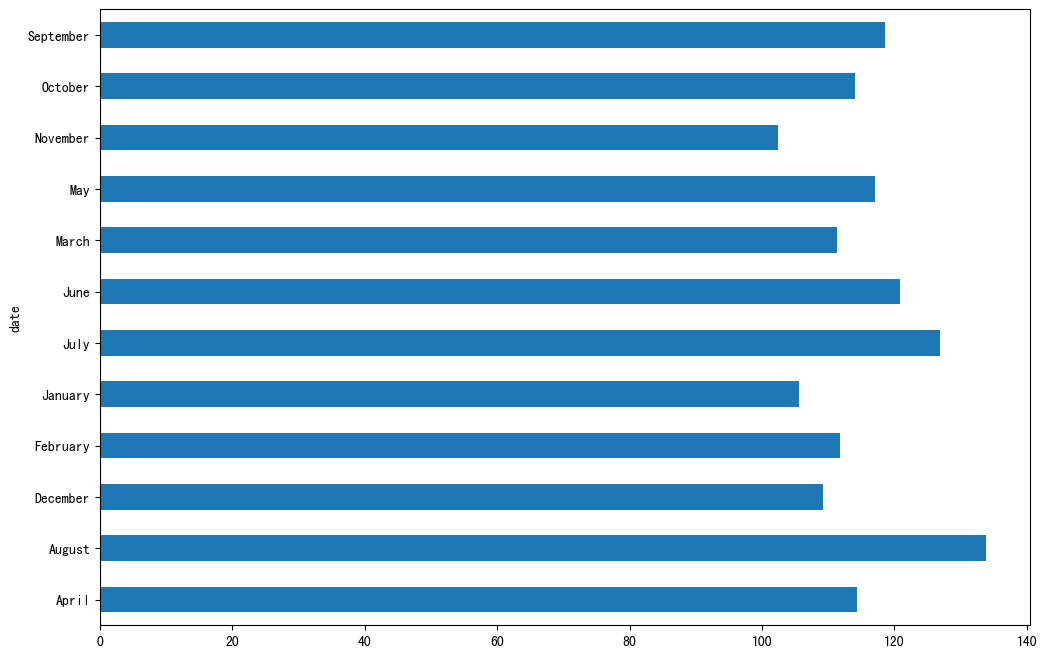

In [126]:
mean_of_mouth.plot(kind='barh',figsize=(12,8))

In [127]:
calendar['dayofweek']=calendar.date.dt.strftime("%A")
calendar.head()

,listing_id,date,available,price,dayofweek
365,14958299,2018-03-25,t,60.0,Sunday
366,14958299,2018-03-24,t,60.0,Saturday
367,14958299,2018-03-23,t,60.0,Friday
368,14958299,2018-03-22,t,60.0,Thursday
369,14958299,2018-03-21,t,60.0,Wednesday


In [128]:
cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [129]:
calendar.groupby(['dayofweek']).mean()

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_3558/4028443008.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  calendar.groupby(['dayofweek']).mean()


,listing_id,price
dayofweek,,
Friday,9.221577e+06,117.198882
Monday,9.206193e+06,114.649274
Saturday,9.226245e+06,117.288036
Sunday,9.220754e+06,114.919700
Thursday,9.210592e+06,114.482776
Tuesday,9.195639e+06,114.570030
Wednesday,9.203787e+06,114.400585


In [130]:
price_week=calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_3558/2223558792.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_week=calendar.groupby(['dayofweek']).mean().reindex(cats)


,listing_id,price
dayofweek,,
Monday,9.206193e+06,114.649274
Tuesday,9.195639e+06,114.570030
Wednesday,9.203787e+06,114.400585
Thursday,9.210592e+06,114.482776
Friday,9.221577e+06,117.198882
Saturday,9.226245e+06,117.288036
Sunday,9.220754e+06,114.919700


In [131]:
price_week.drop('listing_id',axis=1,inplace=True)

<AxesSubplot:xlabel='dayofweek'>

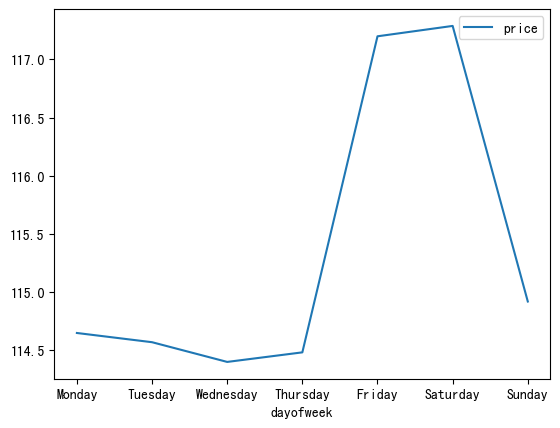

In [132]:
price_week.plot()

In [133]:
calendar.head()

,listing_id,date,available,price,dayofweek
365,14958299,2018-03-25,t,60.0,Sunday
366,14958299,2018-03-24,t,60.0,Saturday
367,14958299,2018-03-23,t,60.0,Friday
368,14958299,2018-03-22,t,60.0,Thursday
369,14958299,2018-03-21,t,60.0,Wednesday


/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_3558/2695946493.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_week=calendar.groupby(['dayofweek']).mean().reindex(cats)


([<matplotlib.axis.XTick at 0x7fa2ebe4a1d0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tues'),
  Text(2, 0, 'Weds'),
  Text(3, 0, 'Thurs'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

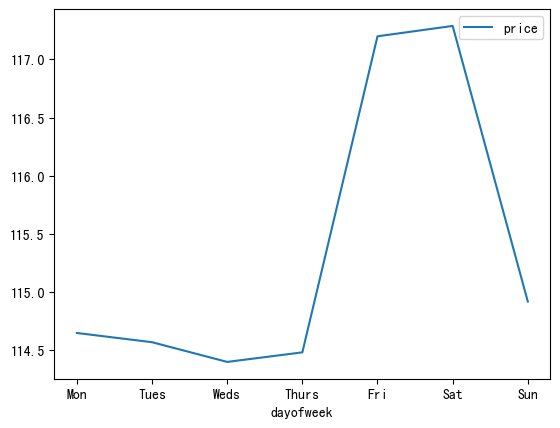

In [134]:
calendar['dayofweek']=calendar.date.dt.strftime("%A")
cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
price_week=calendar[['dayofweek','price']]
price_week=calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.drop('listing_id',axis=1,inplace=True)
price_week.plot()
ticks=list(range(0,7,1))
labels='Mon Tues Weds Thurs Fri Sat Sun'.split(' ')
plt.xticks(ticks,labels)

In [135]:
listings=pd.read_csv('./data/listings.csv.gz')

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_3558/1736432972.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  listings=pd.read_csv('./data/listings.csv.gz')


In [136]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,8207551,https://www.airbnb.com/rooms/8207551,20170407214050,2017-04-08,Room in Sant Antoni huge terrasse,Located between Sant Antoni & Universitat (met...,the apartment is located on the 7th floor and ...,Located between Sant Antoni & Universitat (met...,none,Sant Antoni is a very central neighborhood and...,...,10.0,t,NaN,NaN,f,strict,f,f,2,0.11
1,14958299,https://www.airbnb.com/rooms/14958299,20170407214050,2017-04-08,"Next To Las Ramblas, Unique, Wif1","Brand new apartment, cosy and clean. Only 5 m...","Fun, bohemian. Real Catalan style Well equippe...","Brand new apartment, cosy and clean. Only 5 m...",none,NaN,...,8.0,t,NaN,NaN,t,strict,f,f,1,2.26
2,7766152,https://www.airbnb.com/rooms/7766152,20170407214050,2017-04-08,Sunny whole flat in Raval/Ramblas,"Calm, sunny 43sqm flat. Living room w/balcony ...","Very luminous and calm, in a neighborhood than...","Calm, sunny 43sqm flat. Living room w/balcony ...",none,"Very central, lively, popular hood. Near the s...",...,9.0,t,NaN,NaN,f,strict,f,f,1,0.40
3,9237132,https://www.airbnb.com/rooms/9237132,20170407214050,2017-04-08,Apartment in the heart of Barcelona,The apartment is an ideal place for relax afte...,Both rooms include a comfortable double bed wi...,The apartment is an ideal place for relax afte...,none,NaN,...,9.0,t,NaN,NaN,t,flexible,f,f,1,3.17
4,1406827,https://www.airbnb.com/rooms/1406827,20170407214050,2017-04-08,Centric Bohemian next Ramblas&Macba,Artistic cosy renovated flat 40m2 with balcony...,The apartment is 40m2 and has everything you n...,Artistic cosy renovated flat 40m2 with balcony...,none,Raval is the distric where most of the young a...,...,8.0,t,43212,NaN,t,moderate,f,f,1,5.06


In [137]:
listings.shape

(17653, 95)

In [138]:
listings.review_scores_rating.describe()

count    14015.000000
mean        89.937139
std          9.374362
min         20.000000
25%         86.000000
50%         92.000000
75%         96.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [139]:
listings['price']=listings['price'].str.replace('$','')
listings['price']=listings['price'].str.replace(',','')
listings['price']=listings['price'].astype(float)
listings['price'].describe()

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_3558/1257126038.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price']=listings['price'].str.replace('$','')


count    17653.000000
mean        92.092392
std        159.911422
min          9.000000
25%         35.000000
50%         62.000000
75%        105.000000
max       9379.000000
Name: price, dtype: float64

In [140]:
high_price=listings.sort_values('price',ascending=False)
high_price.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
13702,16738878,https://www.airbnb.com/rooms/16738878,20170407214050,2017-04-08,Villa 1904- Modernist Jewel with Impeccable Views,"This modernist jewel, designed by famous archi...",Impeccably decorated and filled with remarkabl...,"This modernist jewel, designed by famous archi...",none,NaN,...,NaN,t,NaN,NaN,f,super_strict_60,f,f,8,NaN
10353,13259140,https://www.airbnb.com/rooms/13259140,20170407214050,2017-04-08,Nice double room in flat overlooking Montjuic,"Close to Poble Espanyol, CaixaForum, Font Màgi...",NaN,"Close to Poble Espanyol, CaixaForum, Font Màgi...",none,NaN,...,9.0,t,NaN,NaN,f,flexible,f,f,1,0.68
10912,17211611,https://www.airbnb.com/rooms/17211611,20170407214050,2017-04-08,Luxury Motor Yacht in Port Vell,New listing- Professionally crewed motor yacht...,NaN,New listing- Professionally crewed motor yacht...,none,"Bordering Gothic and El Born, the vessel is lo...",...,NaN,t,NaN,NaN,f,flexible,f,f,1,NaN
12100,736098,https://www.airbnb.com/rooms/736098,20170407214050,2017-04-08,Great Discount! Jacuzzi Apartment,NaN,Great Discount. Jacuzzi Appartment at les Cort...,Great Discount. Jacuzzi Appartment at les Cort...,none,NaN,...,10.0,t,NaN,NaN,f,moderate,f,f,1,0.13
1988,16753970,https://www.airbnb.com/rooms/16753970,20170407214050,2017-04-08,Jewel in Ancient City - Architectural Masterpiece,"In the heart of Barcelona's Gothic Quarter, Je...","In the heart of Barcelona's Gothic Quarter, Je...","In the heart of Barcelona's Gothic Quarter, Je...",none,NaN,...,NaN,t,NaN,NaN,f,super_strict_60,f,f,8,NaN
12965,16754469,https://www.airbnb.com/rooms/16754469,20170407214050,2017-04-08,City Lux - A Spacious 3BR Condo in the City!,"This majestic residence, located in one of the...","Upon entering this 3800 square foot residence,...","This majestic residence, located in one of the...",none,NaN,...,NaN,t,NaN,NaN,f,super_strict_60,f,f,8,NaN
1999,16751496,https://www.airbnb.com/rooms/16751496,20170407214050,2017-04-08,Villa Adriana- Stunning Views of the Mediterra...,"Upon arriving at Villa Adriana, guests are swe...","Upon arriving at Villa Adriana, guests are swe...","Upon arriving at Villa Adriana, guests are swe...",none,NaN,...,NaN,t,NaN,NaN,f,super_strict_60,f,f,8,NaN
12465,17234057,https://www.airbnb.com/rooms/17234057,20170407214050,2017-04-08,Casa Arriba - 4BR with Spectacular Views,Perched high in Barcelona with spectacular vie...,"Flooded with light, the great room is expansiv...",Perched high in Barcelona with spectacular vie...,none,NaN,...,NaN,t,NaN,NaN,f,strict,f,f,8,NaN
13000,3965808,https://www.airbnb.com/rooms/3965808,20170407214050,2017-04-08,Luxury penthouse in Turó Park,Impressive 450sqm penthouse located in the exc...,This 450sqm penthouse takes up the entire 7th ...,Impressive 450sqm penthouse located in the exc...,none,The Turó Park area is one of the most exclusiv...,...,NaN,t,NaN,NaN,f,strict,f,f,1,NaN
4596,14466637,https://www.airbnb.com/rooms/14466637,20170407214050,2017-04-08,Double room in the centre of Barcelona,"With a charming, central location in the heart...",NaN,"With a charming, central location in the heart...",none,"En el centro de Barcelona, una zona con muchas...",...,9.0,t,NaN,NaN,f,flexible,f,f,1,0.79


<AxesSubplot:>

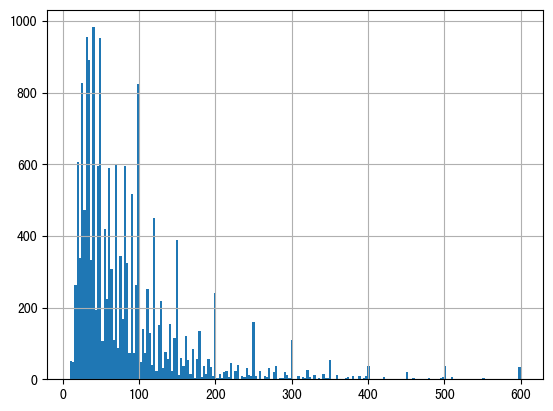

In [141]:
listings.loc[(listings['price']<=600) & (listings['price']>0)].price.hist(bins=200)


<AxesSubplot:xlabel='room_type', ylabel='price'>

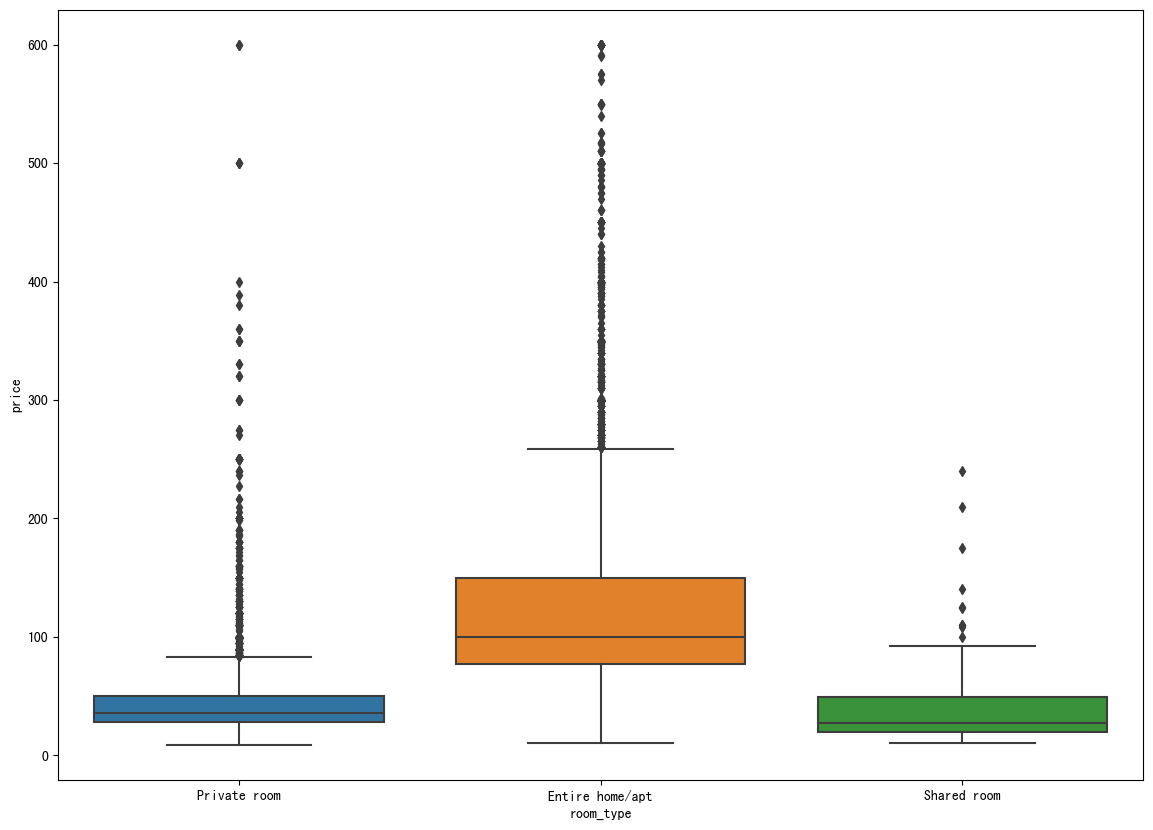

In [142]:
f,ax=plt.subplots(figsize=(14,10))
sns.boxplot(y='price',x='room_type',data=listings.loc[(listings['price']<=600)&(listings['price']>0)])

In [143]:
listings.amenities[:5]

0    {TV,Internet,"Wireless Internet","Air conditio...
1    {Internet,"Wireless Internet",Kitchen,Washer,E...
2    {Internet,"Wireless Internet","Air conditionin...
3    {Internet,"Wireless Internet",Kitchen,"Elevato...
4    {"Wireless Internet",Kitchen,"Smoking allowed"...
Name: amenities, dtype: object

In [144]:
listings.amenities=listings.amenities.str.replace('[{}]','').str.replace('"','')

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_3558/1656305320.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  listings.amenities=listings.amenities.str.replace('[{}]','').str.replace('"','')


In [145]:
listings.amenities[:5]

0    TV,Internet,Wireless Internet,Air conditioning...
1    Internet,Wireless Internet,Kitchen,Washer,Esse...
2    Internet,Wireless Internet,Air conditioning,Ki...
3    Internet,Wireless Internet,Kitchen,Elevator in...
4    Wireless Internet,Kitchen,Smoking allowed,Pets...
Name: amenities, dtype: object

In [146]:
listings['amenities'].map(lambda amns:amns.split(','))[:5]

0    [TV, Internet, Wireless Internet, Air conditio...
1    [Internet, Wireless Internet, Kitchen, Washer,...
2    [Internet, Wireless Internet, Air conditioning...
3    [Internet, Wireless Internet, Kitchen, Elevato...
4    [Wireless Internet, Kitchen, Smoking allowed, ...
Name: amenities, dtype: object

In [147]:
np.concatenate(listings['amenities'].map(lambda amns:amns.split(',')))

array(['TV', 'Internet', 'Wireless Internet', ..., 'Essentials',
       'Hangers', 'translation missing: en.hosting_amenity_49'],
      dtype='<U42')

In [148]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns:amns.split(',')))).value_counts().head(10)

Wireless Internet       16804
Kitchen                 15877
Essentials              15052
Washer                  13669
Heating                 13108
TV                      11856
Elevator in building    10792
Hangers                 10761
Family/kid friendly     10619
Hair dryer              10273
dtype: int64

<AxesSubplot:>

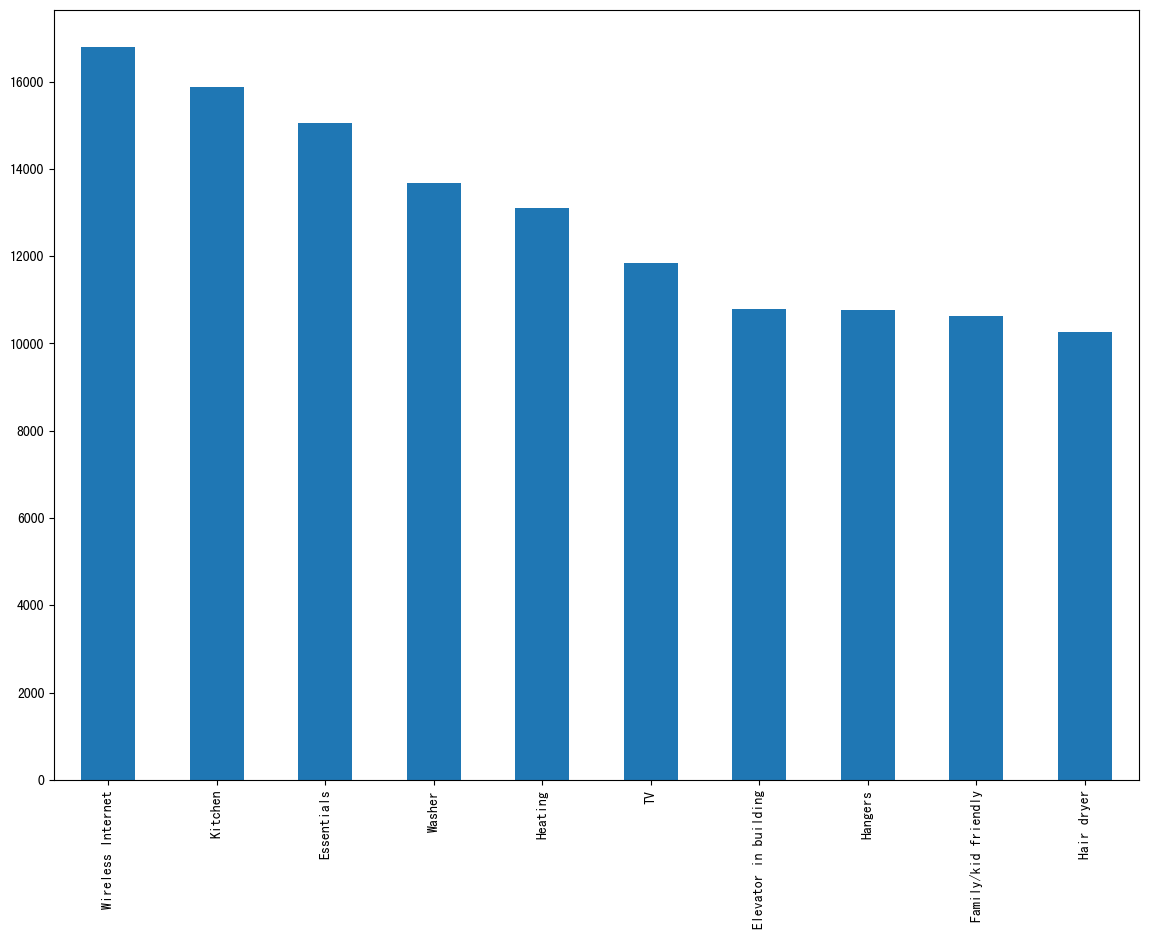

In [149]:
f.ax=plt.subplots(figsize=(14,10))
pd.Series(np.concatenate(listings['amenities'].map(lambda amns:amns.split(',')))).value_counts().head(10).plot(kind='bar')

In [150]:
#特征预处理
col=['host_listings_count','accommodates','bathrooms','bedrooms','beds',
     'price','number_of_reviews','review_scores_rating','review_per_mouth']

In [151]:
listings.loc[(listings['price']<=600)&(listings['price']>0)].groupby(['bathrooms','bedrooms']).count()['price']

bathrooms  bedrooms
0.0        1.0         55
           2.0          1
           3.0          1
0.5        0.0          2
           1.0         81
                       ..
8.0        1.0          5
           3.0          1
           5.0          1
           6.0          1
           9.0          3
Name: price, Length: 76, dtype: int64

In [152]:
listings.loc[(listings['price']<=600)&(listings['price']>0)].groupby(['bathrooms','bedrooms']).count()['price'].reset_index()

,bathrooms,bedrooms,price
0,0.0,1.0,55
1,0.0,2.0,1
2,0.0,3.0,1
3,0.5,0.0,2
4,0.5,1.0,81
...,...,...,...
71,8.0,1.0,5
72,8.0,3.0,1
73,8.0,5.0,1
74,8.0,6.0,1


In [153]:
listings.loc[(listings['price']<=600)&(listings['price']>0)].groupby(['bathrooms','bedrooms']).count()['price'].reset_index().pivot('bathrooms','bedrooms','price')

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_3558/562565114.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  listings.loc[(listings['price']<=600)&(listings['price']>0)].groupby(['bathrooms','bedrooms']).count()['price'].reset_index().pivot('bathrooms','bedrooms','price')


bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
bathrooms,,,,,,,,,,,
0.0,NaN,55.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,2.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,466.0,8748.0,2428.0,712.0,70.0,1.0,1.0,NaN,NaN,NaN,NaN
1.5,7.0,787.0,162.0,144.0,49.0,3.0,1.0,NaN,NaN,NaN,NaN
2.0,9.0,1233.0,766.0,871.0,330.0,47.0,11.0,1.0,1.0,NaN,NaN
2.5,NaN,42.0,19.0,35.0,25.0,7.0,6.0,NaN,NaN,NaN,NaN
3.0,1.0,49.0,4.0,68.0,61.0,35.0,15.0,NaN,NaN,NaN,NaN
3.5,NaN,8.0,NaN,4.0,7.0,5.0,2.0,NaN,NaN,NaN,NaN
4.0,NaN,27.0,1.0,5.0,27.0,3.0,6.0,2.0,1.0,2.0,NaN


In [154]:
cur_input=listings.loc[(listings['price']<=600)&(listings['price']>0)].groupby(['bathrooms','bedrooms']).count()['price'].reset_index().pivot('bathrooms','bedrooms','price')

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_3558/3859323300.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  cur_input=listings.loc[(listings['price']<=600)&(listings['price']>0)].groupby(['bathrooms','bedrooms']).count()['price'].reset_index().pivot('bathrooms','bedrooms','price')


<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

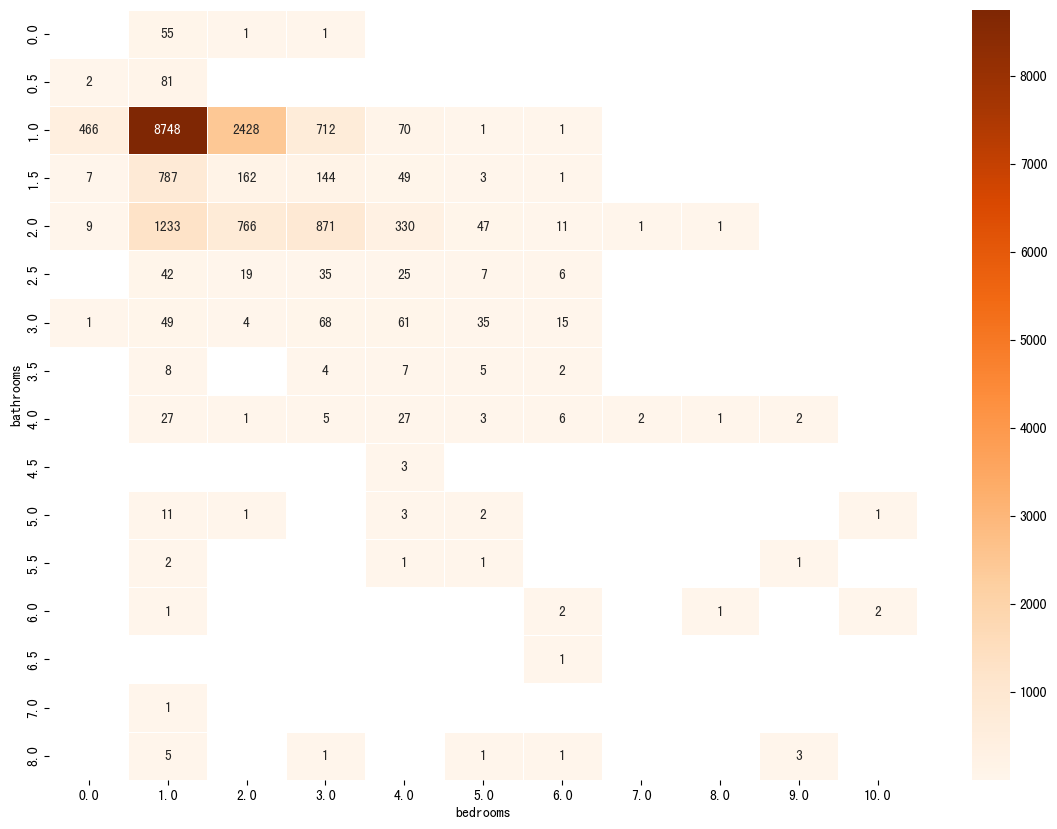

In [155]:
f,ax=plt.subplots(figsize=(14,10))
sns.heatmap(cur_input,cmap='Oranges',annot=True,linewidths=0.5,fmt='.0f')

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_3558/193897695.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cur_input=listings.loc[(listings['price']<=600)&(listings['price']>0)].groupby(['bathrooms','bedrooms']).mean()['price'].reset_index().pivot('bathrooms','bedrooms','price')
/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_3558/193897695.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  cur_input=listings.loc[(listings['price']<=600)&(listings['price']>0)].groupby(['bathrooms','bedrooms']).mean()['price'].reset_index().pivot('bathrooms','bedrooms','price')


<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

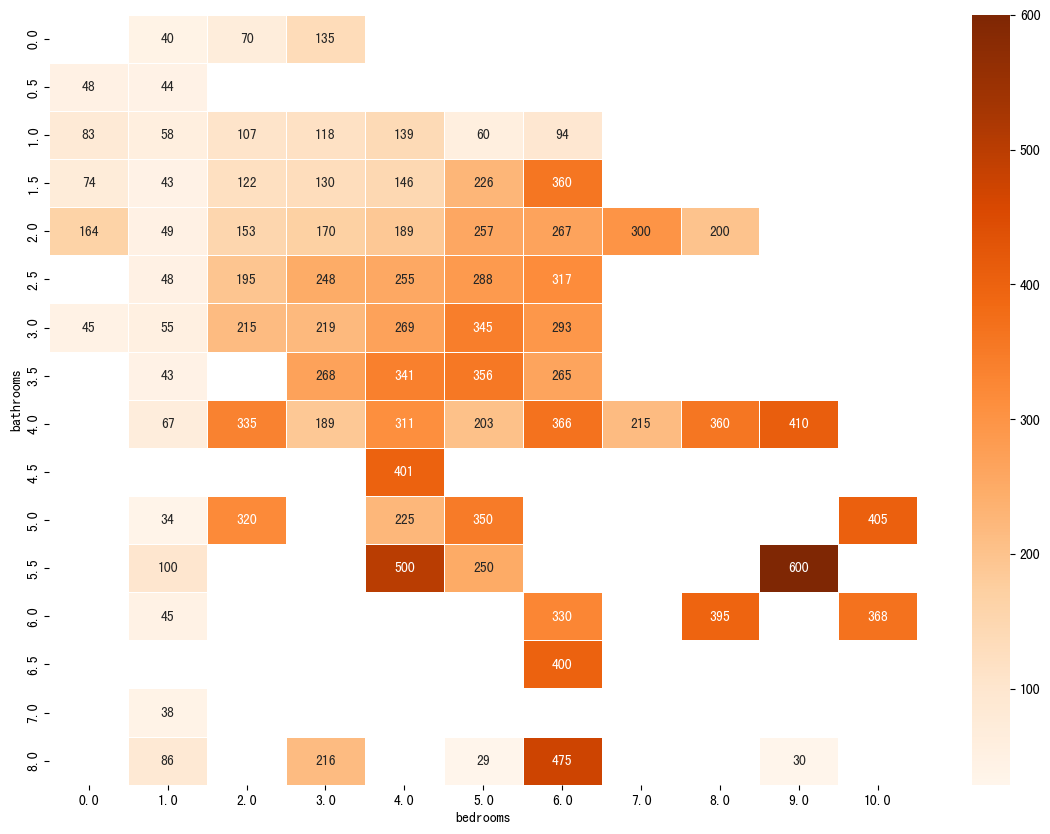

In [156]:
cur_input=listings.loc[(listings['price']<=600)&(listings['price']>0)].groupby(['bathrooms','bedrooms']).mean()['price'].reset_index().pivot('bathrooms','bedrooms','price')
f,ax=plt.subplots(figsize=(14,10))
sns.heatmap(cur_input,cmap='Oranges',annot=True,linewidths=0.5,fmt='.0f')


In [5]:
listings=pd.read_csv('./data/listings.csv.gz')

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_10016/1736432972.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  listings=pd.read_csv('./data/listings.csv.gz')


In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,8207551,https://www.airbnb.com/rooms/8207551,20170407214050,2017-04-08,Room in Sant Antoni huge terrasse,Located between Sant Antoni & Universitat (met...,the apartment is located on the 7th floor and ...,Located between Sant Antoni & Universitat (met...,none,Sant Antoni is a very central neighborhood and...,...,10.0,t,NaN,NaN,f,strict,f,f,2,0.11
1,14958299,https://www.airbnb.com/rooms/14958299,20170407214050,2017-04-08,"Next To Las Ramblas, Unique, Wif1","Brand new apartment, cosy and clean. Only 5 m...","Fun, bohemian. Real Catalan style Well equippe...","Brand new apartment, cosy and clean. Only 5 m...",none,NaN,...,8.0,t,NaN,NaN,t,strict,f,f,1,2.26
2,7766152,https://www.airbnb.com/rooms/7766152,20170407214050,2017-04-08,Sunny whole flat in Raval/Ramblas,"Calm, sunny 43sqm flat. Living room w/balcony ...","Very luminous and calm, in a neighborhood than...","Calm, sunny 43sqm flat. Living room w/balcony ...",none,"Very central, lively, popular hood. Near the s...",...,9.0,t,NaN,NaN,f,strict,f,f,1,0.40
3,9237132,https://www.airbnb.com/rooms/9237132,20170407214050,2017-04-08,Apartment in the heart of Barcelona,The apartment is an ideal place for relax afte...,Both rooms include a comfortable double bed wi...,The apartment is an ideal place for relax afte...,none,NaN,...,9.0,t,NaN,NaN,t,flexible,f,f,1,3.17
4,1406827,https://www.airbnb.com/rooms/1406827,20170407214050,2017-04-08,Centric Bohemian next Ramblas&Macba,Artistic cosy renovated flat 40m2 with balcony...,The apartment is 40m2 and has everything you n...,Artistic cosy renovated flat 40m2 with balcony...,none,Raval is the distric where most of the young a...,...,8.0,t,43212,NaN,t,moderate,f,f,1,5.06


In [7]:
listings['price']=listings['price'].str.replace(',','')
listings['price']=listings['price'].str.replace('$','')
listings['price']=listings['price'].astype(float)
listings=listings.loc[(listings.price<=600) & (listings.price>0)]

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_10016/526938751.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price']=listings['price'].str.replace('$','')


In [8]:
listings.amenities=listings.amenities.str.replace("[{}]","").str.replace('"',"")

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_10016/560585690.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  listings.amenities=listings.amenities.str.replace("[{}]","").str.replace('"',"")


In [9]:
columns=['host_is_superhost','host_identity_verified','host_has_profile_pic',
        'is_location_exact','requires_license','instant_bookable',
        'require_guest_profile_picture','require_guest_phone_verification']
for c in columns:
    listings[c]=listings[c].replace('f',0,regex=True)
    listings[c]=listings[c].replace('t',1,regex=True)

In [10]:
listings['security_deposit']=listings['security_deposit'].fillna(value=0)
listings['security_deposit']=listings['security_deposit'].replace('[\$,)]','',regex=True).astype(float)
listings['cleaning_fee']=listings['cleaning_fee'].fillna(value=0)
listings['cleaning_fee']=listings['cleaning_fee'].replace('[\$,)]','',regex=True).astype(float)


In [11]:
listings_new=listings[['host_is_superhost','host_identity_verified','host_has_profile_pic',
        'is_location_exact','requires_license','instant_bookable',
        'require_guest_profile_picture','require_guest_phone_verification',
                      'security_deposit','cleaning_fee','host_listings_count',
                      'host_total_listings_count','minimum_nights','bathrooms',
                      'bedrooms','guests_included','number_of_reviews',
                      'review_scores_rating','price']]

In [12]:
for col in listings_new.columns[listings_new.isnull().any()]:
    print(col)

host_is_superhost
host_identity_verified
host_has_profile_pic
host_listings_count
host_total_listings_count
bathrooms
bedrooms
review_scores_rating


In [13]:
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col]=listings_new[col].fillna(listings_new[col].median())

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_10016/145268401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_new[col]=listings_new[col].fillna(listings_new[col].median())
/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_10016/145268401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_new[col]=listings_new[col].fillna(listings_new[col].median())
/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_10016/145268401.py:2: SettingWithCopyWarning: 
A value is

In [14]:
for cat_feature in ['zipcode','property_type','room_type','cancellation_policy',
                   'neighbourhood_cleansed','bed_type']:
    listings_new=pd.concat([listings_new,pd.get_dummies(listings[cat_feature])],axis=1)
    

In [15]:
listings_new.head()

,host_is_superhost,host_identity_verified,host_has_profile_pic,is_location_exact,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,security_deposit,cleaning_fee,...,la Vila Olímpica del Poblenou,la Vila de Gràcia,les Corts,les Roquetes,les Tres Torres,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,0.0,1.0,1.0,1,1,0,0,0,0.0,15.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,1.0,0,1,1,0,0,0.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,1.0,1.0,0,1,0,0,0,300.0,10.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,1.0,1,1,1,0,0,100.0,25.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,1.0,1.0,1,1,1,0,0,100.0,20.0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [17]:
y=listings_new['price']
x=listings_new.drop('price',axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [18]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_fit=std.fit(X_train)
X_train=X_fit.transform(X_train)
X_test=X_fit.transform(X_test)

TypeError: Feature names are only supported if all input features have string names, but your input has ['float', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [16]:
rf=RandomForestRegressor(n_estimators=500,n_jobs=-1)
rf.fit(X_train,y_train)
y_train_predict=rf.predict(X_train)
y_test_predict=rf.predict(X_test)
rmse_rf=mean_squared_error(y_test,y_test_predict)**(1/2)

In [17]:
rmse_rf

45.70155101813467

In [18]:
r2_score(y_test,y_test_predict)

0.6361142209724786

In [19]:
from lightgbm import LGBMRegressor

In [20]:
fit_params={
    'early_stopping_rounds':10,
    'eval_metric':'rmse',
    'eval_set':[(X_test,y_test)],
    'eval_names':['valid'],
    'verbose':100
}

In [21]:
lgb=LGBMRegressor(max_depth=20,learning_rate=0.01,n_estimators=1000)
lgb.fit(X_train,y_train,**fit_params)

TypeError: LGBMRegressor.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [64]:
y_pred=lgb.predict(X_test)

In [67]:
r2_score(y_test,y_pred)

0.6739676061684816

In [23]:
reviews=pd.read_csv('./data/reviews.csv.gz',parse_dates=['date'])

In [24]:
reviews['year']=reviews['date'].dt.year
reviews['month']=reviews['date'].dt.month

In [25]:
reviews.groupby('year').size()

year
2010        47
2011       798
2012      3896
2013     13957
2014     42071
2015     96211
2016    200531
2017     53860
dtype: int64

<AxesSubplot:xlabel='month'>

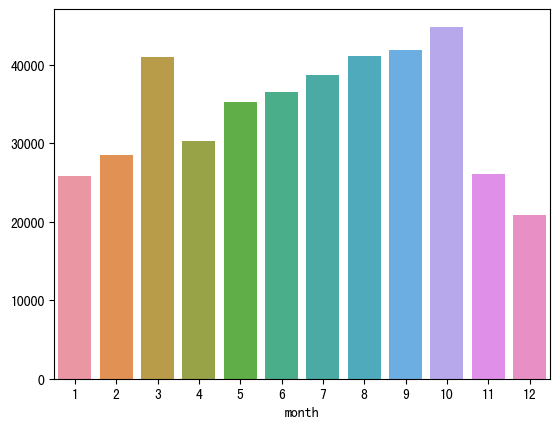

In [30]:
n_reviews_months=reviews.groupby('month').size()
sns.barplot(x=n_reviews_months.index,y=n_reviews_months.values)

In [32]:
year_month_reviews=reviews.groupby(['year','month']).size().unstack('month').fillna(0)
year_month_reviews

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,0.0,2.0,0.0,1.0,3.0,4.0,2.0,8.0,15.0,9.0,1.0,2.0
2011,7.0,8.0,15.0,36.0,59.0,81.0,94.0,104.0,129.0,117.0,91.0,57.0
2012,93.0,76.0,185.0,259.0,360.0,418.0,478.0,491.0,506.0,502.0,310.0,218.0
2013,293.0,316.0,656.0,964.0,1466.0,1471.0,1591.0,1698.0,1826.0,1770.0,1059.0,847.0
2014,1084.0,1198.0,1937.0,2787.0,3743.0,4316.0,4609.0,5469.0,5530.0,5510.0,3344.0,2544.0
2015,3133.0,2915.0,5599.0,7385.0,9718.0,10349.0,10641.0,11093.0,11286.0,11752.0,6790.0,5550.0
2016,7194.0,9391.0,10464.0,15949.0,19946.0,19888.0,21261.0,22343.0,22620.0,25233.0,14553.0,11689.0
2017,14097.0,14569.0,22209.0,2985.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


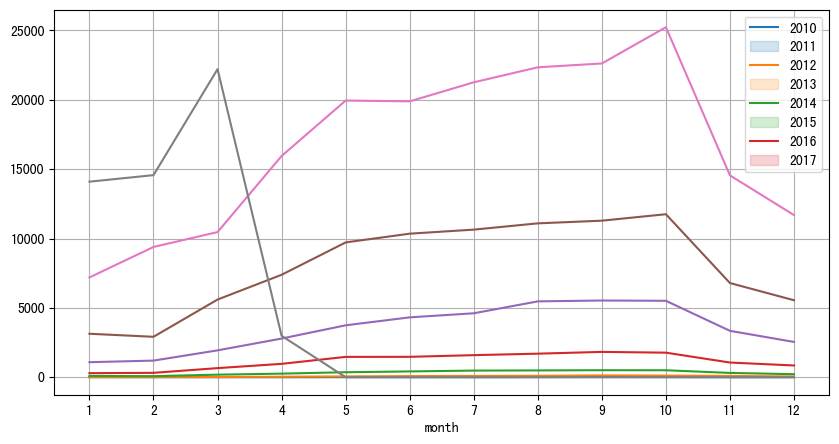

In [33]:
fig,ax=plt.subplots(figsize=(10,5))
for index in year_month_reviews.index:
    series = year_month_reviews.loc[index]
    sns.lineplot(x=series.index,y=series.values,ax=ax)
    
ax.legend(labels=year_month_reviews.index)
ax.grid()
ax.set_xticks(list(range(1,13)))
